In [ ]:
import numpy as np
from scipy.integrate import odeint, quad, solve_bvp
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving map.npy to map.npy


In [ ]:
# not quite sure how we make v_max work but here it is 
# maybe we can import the track maker and it will tell us if a 
# point is on the track or in the grass or out of bounds

# this is a mock v_max
# track = np.load('map.npy')
def v_max(x,y):
    return np.exp(x)

# odes
# X = (x,y,v,theta,p1,p2,p3,p4)
def x_dot(X,c):
    v,theta = X[2],X[3]
    return v*np.cos(theta)

def y_dot(X,c):
    v,theta = X[2],X[3]
    return v*np.sin(theta)

def v_dot(X,c):
    x,y,v = X[0],X[1],X[2]
    return .1*(u1(X,c) - (v / v_max(x,y)))

def theta_dot(X,c):
    v= X[2]
    return .05*(u2(X,c) / (1 + v))

def u1(X,c):
    return np.sign(X[6]*.1)

def u2(X,c):
    return np.sign(X[7]*.05 / (1 + X[2]))

def p1_dot(X,c):
    x,y,v = X[0],X[1],X[2]
    p3 = X[6]
    return v*p3*(v_max(x,y))
    # return np.zeros_like(X[0])

def p2_dot(X,c):
    x,y,v = X[0],X[1],X[2]
    p3 = X[6]
    return v*p3*(v_max(x,y))
    # return np.zeros_like(X[0])

def p3_dot(X,c):
    x,y,v,theta,p1,p2,p3,p4 = X[0],X[1],X[2],X[3],X[4],X[5],X[6],X[7],
    t1 = -p1*np.cos(theta) - p2*np.sin(theta)
    t2 =  p3*.1*v_max(x,y) + p4 *.05 * u2(X,c)/ (1 + v)**2
    return t1 + t2

def p4_dot(X,c):
    v,theta,p1,p2 = X[2],X[3],X[4],X[5]
    return p1*v*np.sin(theta) - p2*v*np.cos(theta)


# final ode function
def rhs(t, X, c):
    to_return = c[0]*np.vstack(
        [
         x_dot(X,c), y_dot(X,c), v_dot(X,c),
         theta_dot(X,c),p1_dot(X,c), p2_dot(X,c),
         p3_dot(X,c), p4_dot(X,c)
        ]
    )
    return to_return

def bc(ya, yb, c):
    '''
    function evaluating residuals of the boundary conditions.
    The calling signature is bc(ya, yb), or bc(ya, yb, p) if
    parameters are present. All arguments are ndarray:
    ya and yb with shape (n,), and p with shape (k,).
    The return value must be an array with shape (n + k,).
    '''
    
    return np.array(
        [
        #  x0
         ya[0],
        #  xf
         yb[0] - 5,
        #  y0
         ya[1],
        #  yf
         yb[1] - 10,
        #  v0
         ya[2],
        #  theta0
         ya[3],
        #  p4f
         yb[7],
        #  p3f
         yb[6],
        #  hamiltonian is 0 along optimal things
         np.abs(ya[6]*.1) + np.abs(ya[7]*.05) - 1
        ]
    )

In [ ]:
t = np.linspace(0,10,10)
y = np.array([np.exp(t)]*8)
sol = solve_bvp(rhs,bc,t,y,np.array([5]),tol=1e-8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/scipy/integrate/_bvp.py:312: RuntimeWarning: invalid value encountered in subtract
  0.125 * h * (f[:, 1:] - f[:, :-1]))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/scipy/integrate/_bvp.py:315: RuntimeWarning: invalid value encountered in add
  4 * f_middle)
/usr/local/lib/python3.6/dist-packages/scipy/integrate/_bvp.py:42: RuntimeWarning: invalid value encountered in subtract
  df_dy[:, i, :] = (f_new - f0) / hi
/usr/local/lib/python3.6/dist-packages/scipy/integrate/_bvp.py:55: RuntimeWarning: invalid value encountered in subtract
  df_dp[:, i, :] = (f_new - f0) / hi
/usr/local/lib/python3.6/dist-packages/scipy/in

t_f =  5.0


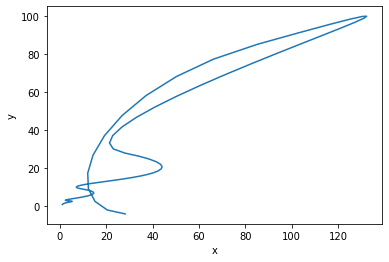

In [ ]:
print('t_f = ',sol.p[0])

t_f = sol.p[0]
t_plot = np.linspace(0, 1, 100)*t_f
x_plot = sol.sol(t_plot)[0]
y_plot = sol.sol(t_plot)[1]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
sol

       message: 'A singular Jacobian encountered when solving the collocation system.'
         niter: 1
             p: array([5.])
 rms_residuals: array([  4.57930334,   7.87095671,  21.62514459,  86.81924698,
       171.12303021,          nan,          nan,          nan,
                nan])
           sol: <scipy.interpolate.interpolate.PPoly object at 0x7ff3a90321a8>
        status: 2
       success: False
             x: array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])
             y: array([[1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
        8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
        7.25095809e+03, 2.20264658e+04],
       [1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
        8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
        7.25095809e+03, 2.20264658e+04],
       [1.00000000e+00, 3.03773178e+0

In [ ]:
u1(sol.y, c)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
u2(sol.y,c)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])